In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titan = pd.read_csv('titanic_train.csv') # Training set is already available
titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#displays basic statistics on the dataset
x = titan.describe()
x 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
#Shows the amount of unique values for each category
print("Count of unique values:")
print(titan.nunique())



Count of unique values:
PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


In [4]:
# This is the pearson Correlation between all columns
print("\nCorrelation matrix:")
print(titan.corr())


Correlation matrix:
             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


Heat Maps allow you to see the correlation of two variables with one another. 
The closer the number is to 1 means that the two variables are strongly correlated, but a number closer to 0 means less of a correlation 


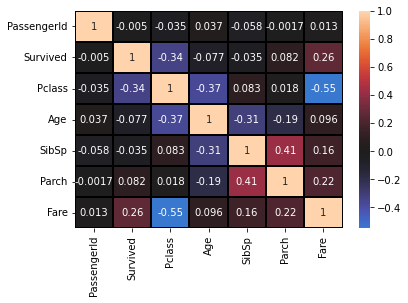

In [5]:
#Heatmap beggining 
#Heatmap for the whole csv
#Heatmap displays teh pearson correlation between each variable
print("Heat Maps allow you to see the correlation of two variables with one another. ")
print("The closer the number is to 1 means that the two variables are strongly correlated, but a number closer to 0 means less of a correlation ")
linewidths = 2
linecolor = "black"
annot = True

sns.heatmap(titan.corr(), 
           annot = annot, 
           center = 0,
           linewidths=linewidths,
            linecolor=linecolor)

plt.show()


array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

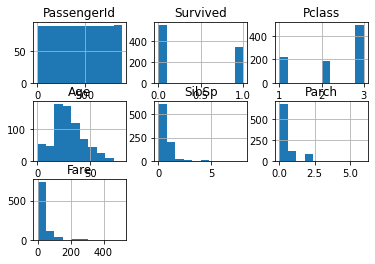

In [6]:
#Displays the frequencies for each dataset
titan.hist()

Text(0.5, 1.0, 'Bar plot of the count of numeric features')

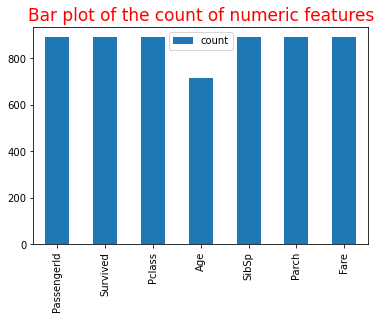

In [7]:
#displays the amount of values present for each category
xT=x.T
xT.plot.bar(y = 'count')
plt.title("Bar plot of the count of numeric features", fontsize=17, color = 'red')

In [8]:

from scipy import stats


#Set age threshold to 50 as a rule of thumb for young vs old passengers 
age_threshold = 50

#There are four categories present, those older than 50 and survived, younger than 50 and survived
#older than 50 died, younger than 50 and died
sample_1_survivedA = titan[(titan['Age'] < age_threshold) & (titan['Survived'] == 1)]
sample_1_not_survivedA = titan[(titan['Age'] < age_threshold) & (titan['Survived'] == 0)]
sample_2_survivedA = titan[(titan['Age'] >= age_threshold) & (titan['Survived'] == 1)]
sample_2_not_survivedA = titan[(titan['Age'] >= age_threshold) & (titan['Survived'] == 0)]

#obtain the t statistic as well as the P value for those that survived and drop null values
t_statisticA, p_valueA = stats.ttest_ind(sample_1_survivedA['Age'].dropna(), sample_2_survivedA['Age'].dropna(), equal_var=True, permutations = None, random_state = None)
print("t-test for young survivors(under 50) vs older survivors(greater than 50):")
print(f"t stat: {t_statisticA}")
print(f"p-value: {p_valueA}")

#obtain the t statistic as well as p value for those that died and drop null values
t_statisticB, p_valueB = stats.ttest_ind(sample_1_not_survivedA['Age'].dropna(), sample_2_not_survivedA['Age'].dropna(), equal_var=True,  permutations = None, random_state = None)
print("t-test for dead passengers(under 50) vs dead passengres older than 50")
print(f"t stat: {t_statisticB}")
print(f"p-value: {p_valueB}")


print("conclusion younger people were more likely to die as the t stat was much lower in not survived group")



t-test for young survivors(under 50) vs older survivors(greater than 50):
t stat: -12.573392344359636
p-value: 3.3891548884751683e-29
t-test for dead passengers(under 50) vs dead passengres older than 50
t stat: -19.71100252002944
p-value: 8.688898796743436e-62
conclusion younger people were more likely to die as the t stat was much lower in not survived group


In [9]:
#Set fare threshold to 30 as a rule of thumb for expensive vs inexpensive tickets
fare_threshold = 30

#There are four categories present, those who paid less than 30 and survived, those who paid less than 30 and died
#Those who paid more than 30 and survived, those who paid more than 30 and died
sample_1_survivedB = titan[(titan['Fare'] < fare_threshold) & (titan['Survived'] == 1)]
sample_1_not_survivedB = titan[(titan['Fare'] < fare_threshold) & (titan['Survived'] == 0)]
sample_2_survivedB = titan[(titan['Fare'] >= fare_threshold) & (titan['Survived'] == 1)]
sample_2_not_survivedB = titan[(titan['Fare'] >= fare_threshold) & (titan['Survived'] == 0)]

#Once again obtain the t statistic and P value for survivors
t_statisticC, p_valueC = stats.ttest_ind(sample_1_survivedB['Fare'].dropna(), sample_2_survivedB['Fare'].dropna(), equal_var=True, permutations = None, random_state = None)
print("t-test for survivors that paid under 30 dollars in fares vs over 30 dollars :")
print(f"t stat: {t_statisticC}")
print(f"p-value: {p_valueC}")

#obtain the t statistic and p value for non survivors
t_statisticD, p_valueD = stats.ttest_ind(sample_1_not_survivedB['Fare'].dropna(), sample_2_not_survivedB['Fare'].dropna(), equal_var=True,  permutations = None, random_state = None)
print("t-test for dead passengers that paid under 30 dollars in fares vs over 30 dollars:")
print(f"t stat: {t_statisticD}")
print(f"p-value: {p_valueD}")

print("conclusion, poorer people were more likely to die as the t stat was much lower in the not survived group ")

t-test for survivors that paid under 30 dollars in fares vs over 30 dollars :
t stat: -13.662535405884613
p-value: 3.543314720673612e-34
t-test for dead passengers that paid under 30 dollars in fares vs over 30 dollars:
t stat: -22.18520321478726
p-value: 2.940293941361196e-78
conclusion, poorer people were more likely to die as the t stat was much lower in the not survived group 


In [10]:




# Variables PClass and Sex are established to do analysis on as they are non categorical variables and haven't been analyzed yet
nonnumerical_cate = ['Pclass', 'Sex']

#Given each category for P class and Sex find the proportion of survivors
for category in nonnumerical_cate:
    # Calculate the survival proportion by the current category
    nonnumerical_cate = titan.groupby(category)['Survived'].mean()

    print(f"Survival proportion by {category}:")
    print(nonnumerical_cate)
    
print("---------------------")
print("Conclusion: individuals in class 1 were more likely to survive than classes 2 and class 2 members were more likely than class 3")
print("Conclusion: Females were way more likely to survive than males")

Survival proportion by Pclass:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Survival proportion by Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
---------------------
Conclusion: individuals in class 1 were more likely to survive than classes 2 and class 2 members were more likely than class 3
Conclusion: Females were way more likely to survive than males


In [11]:
from scipy.stats import chi2_contingency

#We display a contingency table to show the survival portion of each Pclass
contingency_table = pd.crosstab(titan['Pclass'], titan['Survived'])


chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(contingency_table)
print("Chi-squared test for Pclass and Survived:")
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p_value}")

print("-------------")
print("The chi square value shows that the values that we are dealing with are very significant")

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119
Chi-squared test for Pclass and Survived:
Chi-square statistic: 102.88898875696056
p-value: 4.549251711298793e-23
-------------
The chi square value shows that the values that we are dealing with are very significant


In [12]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

# Create a DataFrame with the selected variables
A = titan[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
B = titan['Survived']  # target variable

 #Replace infinity values with NaN
A = A.replace([np.inf, -np.inf], np.nan)


A = A.dropna()
B = B.loc[A.index]

# One-hot encoding for categorical variable 'Sex'
A_encoded = pd.get_dummies(A, columns=['Sex'])

# Split the data into training and testing sets
A_train, A_test, B_train, B_test = train_test_split(A_encoded, B, test_size=0.2, random_state= 10000)

# Create and fit the logistic regression model
model = LogisticRegression(max_iter = 1000)
model.fit(A_train, B_train)


# Make predictions on the test set
predictions = model.predict(A_test)


# Calculate and print the accuracy
accuracy = accuracy_score(B_test, predictions)


#function to calculate and display Predictions, true values, and accuracy
def performance(pre, acc):
    # Print predictions and true values
    print("Predictions:", pre)
    print("True values:", B_test.tolist())
    
    # Print accuracy
    print(f"Accuracy: {acc}")
    
#function to calculate and display f1 scores
def calcf1(predict):
    #print f1 score 
    print("------------------------")
    print("The F1 score for the given model is")
    print(f1_score(predict, B_test))
    
#function to display the classification report and confusion matrix
def confclass(predicts):
    print("------------------------")
    print("Confusion matrix")
    print(confusion_matrix(B_test, predicts))
    
    #classification report which includes f1, precision, recall, etc
    print(classification_report(B_test, predicts))
    
performance(predictions, accuracy)
print("-------------")
print("interpretation: Logistic Regression was 78% correct ")




Predictions: [0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0
 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1
 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1
 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0]
True values: [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
Accuracy: 0.7832167832167832
-------------
interpretation: Logistic Regression was 78% correct 


In [13]:
calcf1(predictions)



------------------------
The F1 score for the given model is
0.7256637168141593


In [14]:
print("The confusion matrix and classification report for logistic regression is as follows")
confclass(predictions)

The confusion matrix and classification report for logistic regression is as follows
------------------------
Confusion matrix
[[71 12]
 [19 41]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        83
           1       0.77      0.68      0.73        60

    accuracy                           0.78       143
   macro avg       0.78      0.77      0.77       143
weighted avg       0.78      0.78      0.78       143



--------------------------------
This is the area under the curve
0.8594377510040161


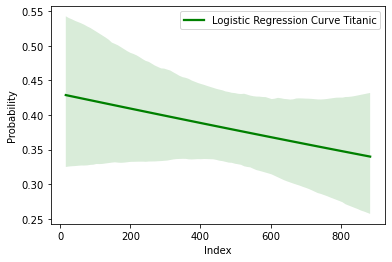

In [15]:
#find the area under the curve the judge our logistic regression 
ypredictionprob = model.predict_proba(A_test)[::,1]

auc = metrics.roc_auc_score(B_test, ypredictionprob)

#print AUC score
print("--------------------------------")
print("This is the area under the curve")
print(auc)

#plotting logistic regression curve
sns.regplot(x=A_test.index, y=ypredictionprob, logistic=True, scatter=False, color='green', label='Logistic Regression Curve Titanic')

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Probability')
plt.legend()
plt.show()

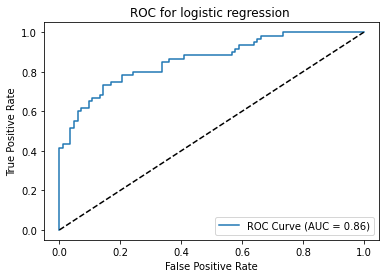

In [16]:
from sklearn.metrics import roc_curve, auc

# Make predictions on the test set probabilities
probabilities = model.predict_proba(A_test)[:, 1]

# calculate fpr, tpr and trhesholds
fpr, tpr, thresholds = roc_curve(B_test, probabilities)

# Calculate area under curve
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for logistic regression ')
plt.legend(loc='lower right')
plt.show()


In [17]:
#cross validation for logistic regeression 
cv_scores = cross_val_score(model, A_encoded, B, cv=5)

#each of the 5 scores are shown
print("Cross-validation scores:", cv_scores)

#average performance across all 5 folds
print("Average score:", cv_scores.mean())

Cross-validation scores: [0.76223776 0.81818182 0.77622378 0.76223776 0.81690141]
Average score: 0.7871565054663646


In [18]:


from sklearn.svm import SVC


# Create and fit the Support Vector Machine (SVC) model
model2 = SVC()
model2.fit(A_train, B_train)

# Make predictions given our model
predictions2 = model2.predict(A_test)


# Calculate and print the accuracy
accuracy2 = accuracy_score(B_test, predictions2)


performance(predictions2, accuracy2)



Predictions: [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0
 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1
 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0]
True values: [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
Accuracy: 0.6503496503496503


In [19]:

calcf1(predictions2)



------------------------
The F1 score for the given model is
0.46808510638297873


In [20]:
print("The confusion matrix and Classification report for SVM is as follows")
confclass(predictions2)

The confusion matrix and Classification report for SVM is as follows
------------------------
Confusion matrix
[[71 12]
 [38 22]]
              precision    recall  f1-score   support

           0       0.65      0.86      0.74        83
           1       0.65      0.37      0.47        60

    accuracy                           0.65       143
   macro avg       0.65      0.61      0.60       143
weighted avg       0.65      0.65      0.63       143



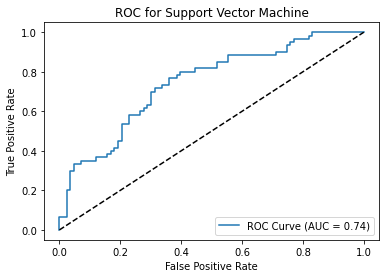

In [21]:
#in this case we need to use the function decision_function() over predict_proba() as we are using SVM
#decision_function finds distance seperating hyperplane
decision_scores = model2.decision_function(A_test)

# Calculate the fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(B_test, decision_scores)

# Calculate the area under the ROC curve 
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Support Vector Machine')
plt.legend(loc='lower right')
plt.show()

In [22]:

cv_scores2 = cross_val_score(model2, A_encoded, B, cv = 5)

# Print the performance scores for each if the 5 folds
print("SVC cross-validation scores:", cv_scores2)

# The mean of all 5 folds
print("Average score:", cv_scores2.mean())


SVC cross-validation scores: [0.53846154 0.75524476 0.67132867 0.6993007  0.69014085]
Average score: 0.6708953018812174


In [23]:
from sklearn.ensemble import RandomForestClassifier


# Create and fit the random forest model
model3 = RandomForestClassifier()
model3.fit(A_train, B_train)

# Make predictions on the test set
predictions3 = model3.predict(A_test)


# Calculate and print the accuracy
accuracy3 = accuracy_score(B_test, predictions3)



#use function performance to display
performance(predictions3, accuracy3)

Predictions: [0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0
 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1
 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0]
True values: [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
Accuracy: 0.7972027972027972


In [24]:
calcf1(predictions3)




------------------------
The F1 score for the given model is
0.7387387387387387


In [25]:
print("The Confusion matrix and Classification report of Random forest is")
confclass(predictions3)

The Confusion matrix and Classification report of Random forest is
------------------------
Confusion matrix
[[73 10]
 [19 41]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        83
           1       0.80      0.68      0.74        60

    accuracy                           0.80       143
   macro avg       0.80      0.78      0.79       143
weighted avg       0.80      0.80      0.79       143



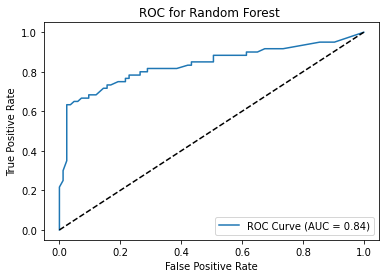

In [26]:
from sklearn.metrics import roc_curve, auc

# Make predictions on the test set probabilities
probabilities = model3.predict_proba(A_test)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(B_test, probabilities)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Random Forest ')
plt.legend(loc='lower right')
plt.show()


In [27]:
cv_scores3 = cross_val_score(model3, A_encoded, B, cv=5)

# Print the performance scores for each fold
print("RandomForestClassifier cross-validation scores:", cv_scores3)

# Calculate and print the average performance across all folds
print("Average score:", cv_scores3.mean())

RandomForestClassifier cross-validation scores: [0.74825175 0.84615385 0.83216783 0.75524476 0.87323944]
Average score: 0.8110115236875799


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = ['model1', 'model2', 'model3']
metrics = []

# Calculate and storing performance metrics 
for model_name, predictions in zip(models, [predictions, predictions2, predictions3]):
    accuracy = accuracy_score(B_test, predictions)
    precision = precision_score(B_test, predictions)
    recall = recall_score(B_test, predictions)
    f1 = f1_score(B_test, predictions)
    
    model_metrics = {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
    
    metrics.append(model_metrics)



Model 1 refers to logistic regression, model2 is SVM, model3 is random forest


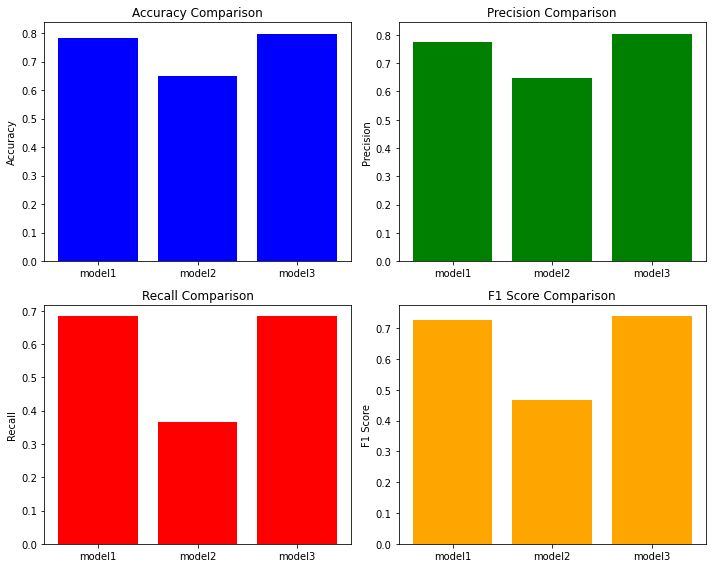

It is clear to see that SVM in this case ranks lowest for each metric and is therefore the least reliable
While Logistic Regression and Random Forest are both very close, random forest changes after every run and is not consistent
Therefore for the sake of consistency Logistic Regression has the best stats


In [29]:
accuracy_values = [metric['Accuracy'] for metric in metrics]
precision_values = [metric['Precision'] for metric in metrics]
recall_values = [metric['Recall'] for metric in metrics]
f1_values = [metric['F1 Score'] for metric in metrics]

# Setting the width of the bars
bar_width = 0.7
index = range(len(models))

# Create subplots 
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot accuracy
axs[0, 0].bar(models, [metric['Accuracy'] for metric in metrics], color = "blue")
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].set_title('Accuracy Comparison')

# Plot precision
axs[0, 1].bar(models, [metric['Precision'] for metric in metrics], color = "green")
axs[0, 1].set_ylabel('Precision')
axs[0, 1].set_title('Precision Comparison')

# Plot recall
axs[1, 0].bar(models, [metric['Recall'] for metric in metrics], color = "red")
axs[1, 0].set_ylabel('Recall')
axs[1, 0].set_title('Recall Comparison')

# Plot F1 score
axs[1, 1].bar(models, [metric['F1 Score'] for metric in metrics], color = "orange")
axs[1, 1].set_ylabel('F1 Score')
axs[1, 1].set_title('F1 Score Comparison')

# Adjust spacing between subplots
plt.tight_layout()

#notice
print("Model 1 refers to logistic regression, model2 is SVM, model3 is random forest")
# Display the plots
plt.show()

#conclusion
print("It is clear to see that SVM in this case ranks lowest for each metric and is therefore the least reliable")
print("While Logistic Regression and Random Forest are both very close, random forest changes after every run and is not consistent")
print("Therefore for the sake of consistency Logistic Regression has the best stats")